# 📊 Dataset Overview

This project utilizes a curated chest X-ray dataset obtained from **Roboflow**, specifically designed for **tumor detection and classification**. The dataset contains annotated images indicating the presence of **small tumors**, labeled as either:

- **Benign** (non-cancerous)
- **Malignant** (cancerous)

### 🧾 Dataset Summary:
- **Training Set**: 1,446 images
- **Testing Set**: 123 images
- **Image Modality**: Chest X-rays
- **Annotations**: Bounding boxes for tumor regions
- **Label Types**: Binary classification (`Benign` / `Malignant`)
- **Orientation**: Each image is oriented between **+30° and -30°**, ensuring consistent and realistic radiological views.

This dataset is ideal for training object detection models, particularly for medical diagnostic purposes.

### 🔍 Objective:
We will be using the **YOLO (You Only Look Once)** model to detect and classify tumors in chest X-ray images. The goal is to localize suspicious regions and predict whether the detected tumor is **benign or malignant** based on the provided annotations.




## 🔗 Mounting Google Drive

Accessing dataset files stored in Google Drive.


In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


## 📂 Dataset Directory Setup & Summary

This section defines the dataset folder paths and prints out the number of images and label files available in both training and testing sets. The dataset follows the YOLO format with separate folders for images and corresponding label files.


In [6]:
import os


dataset_path = "/content/drive/MyDrive/lung3.v1-3.yolov8"

# 📁 Paths to training and testing images and labels
train_images = os.path.join(dataset_path, "train/images")
train_labels = os.path.join(dataset_path, "train/labels")
test_images = os.path.join(dataset_path, "test/images")
test_labels = os.path.join(dataset_path, "test/labels")

# 📊 Print the total number of files in each directory
print("Dataset Summary:")
print("Train Images:", len(os.listdir(train_images)))
print("Train Labels:", len(os.listdir(train_labels)))
print("Test Images:", len(os.listdir(test_images)))
print("Test Labels:", len(os.listdir(test_labels)))


Dataset Summary:
Train Images : 1446
Train Labels : 1436
Test Images  : 123
Test Labels  : 123


## ⚙️ Checking GPU Availability

This step checks whether a CUDA-enabled GPU is available in the current environment (e.g., Google Colab). If available, the name of the GPU is printed. Using a GPU significantly speeds up traini


In [3]:
import torch

# Check if a CUDA-compatible GPU is available
if torch.cuda.is_available():
    print("✅ GPU is available:", torch.cuda.get_device_name(0))
else:
    print("❌ GPU not available. Please make sure it's enabled from the Runtime menu.")


✅ GPU is available: Tesla T4


## 🧹 Removing Unlabeled Images

To ensure training quality and avoid mismatches between images and labels, this step removes any images that **do not have corresponding label files**.

In [4]:
import os
from tqdm import tqdm

def remove_unlabeled_images(images_path, labels_path):

    removed = 0
    image_files = os.listdir(images_path)
    # Loop through each image file with a progress bar for better visualization
    for image_file in tqdm(image_files, desc=f"Processing {images_path}"):
        base_name = os.path.splitext(image_file)[0]
        label_file = base_name + '.txt'
        label_path = os.path.join(labels_path, label_file)

        # Check if the corresponding label file exists; if not, delete the image
        if not os.path.exists(label_path):
            image_path = os.path.join(images_path, image_file)
            os.remove(image_path)
            removed += 1

    return removed
# Apply the cleaning function to training and testing datasets
removed_train = remove_unlabeled_images(train_images, train_labels)
removed_test = remove_unlabeled_images(test_images, test_labels)

# Print a clear summary of how many images were removed from each dataset
print("✅ Cleanup Summary:")
print(f" - Removed {removed_train} unlabeled images from training set ({train_path})")
print(f" - Removed {removed_test} unlabeled images from testing set ({test_path})")


✅ Cleanup Summary:
 - Removed 10 unlabeled images from training set (/content/drive/MyDrive/lung3.v1-3.yolov8/train/images)
 - Removed 0 unlabeled images from testing set (/content/drive/MyDrive/lung3.v1-3.yolov8/test/images)


## 📂Dataset Summary After Cleanup

In [7]:
import os

dataset_path = "/content/drive/MyDrive/lung3.v1-3.yolov8"

# 📁 Paths to training and testing images and labels
train_images = os.path.join(dataset_path, "train/images")
train_labels = os.path.join(dataset_path, "train/labels")
test_images = os.path.join(dataset_path, "test/images")
test_labels = os.path.join(dataset_path, "test/labels")

# 📊 Print the total number of files in each directory
print("Dataset Summary:")
print("Train Images:", len(os.listdir(train_images)))
print("Train Labels:", len(os.listdir(train_labels)))
print("Test Images:", len(os.listdir(test_images)))
print("Test Labels:", len(os.listdir(test_labels)))


Dataset Summary:
Train Images : 1436
Train Labels : 1436
Test Images  : 123
Test Labels  : 123


## 🔄 Organizing Dataset: Training & Validation & Testing


In [8]:
import os
import shutil
import random

# Base dataset path
base_path = "/content/drive/MyDrive/lung3.v1-3.yolov8"

# Original training folders (images and labels)
original_train_images = os.path.join(base_path, "train/images")
original_train_labels = os.path.join(base_path, "train/labels")

# New validation folders (create if not exist)
val_images = os.path.join(base_path, "val/images")
val_labels = os.path.join(base_path, "val/labels")
os.makedirs(val_images, exist_ok=True)
os.makedirs(val_labels, exist_ok=True)

# Test folders (for summary print only)
test_images = os.path.join(base_path, "test/images")
test_labels = os.path.join(base_path, "test/labels")

# Collect all training images (jpg, png)
all_train_images = [img for img in os.listdir(original_train_images) if img.endswith(('.jpg', '.png'))]
random.shuffle(all_train_images)

val_count = 290
val_images_list = all_train_images[:val_count]

print("Moving validation files... (original files will be deleted)")

# Move validation images and labels from train folders to val folders
for img_name in val_images_list:
    label_name = img_name.rsplit(".", 1)[0] + ".txt"

    img_path = os.path.join(original_train_images, img_name)
    label_path = os.path.join(original_train_labels, label_name)

    # Check if both image and label exist before moving
    if os.path.exists(img_path) and os.path.exists(label_path):
        shutil.copy(img_path, os.path.join(val_images, img_name))
        shutil.copy(label_path, os.path.join(val_labels, label_name))
        os.remove(img_path)
        os.remove(label_path)
    else:
        print(f"\nMissing file: {img_name} or {label_name} - Skipped")

# Print final summary of dataset sizes after moving validation data
print("\n--- Final Summary ---")
print(f"Training images after move: {len(os.listdir(original_train_images))}")
print(f"New validation images: {len(os.listdir(val_images))}")
print(f"Test images: {len(os.listdir(test_images))}")


--- Final Summary ---
Training images after move: 1146
New validation images: 290
Test images: 123


## 📊 Lung X-ray Dataset Class Distribution Report

This report summarizes the number of **Benign (class 0)** and **Malignant (class 1)** samples in each dataset split:

- ✅ **Train**
- 🧪 **Validation**
- 🧫 **Test**

The purpose of this analysis is to ensure balanced class representation and diagnose any imbalance issues before model training.




<ipython-input-13-3836898349>:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


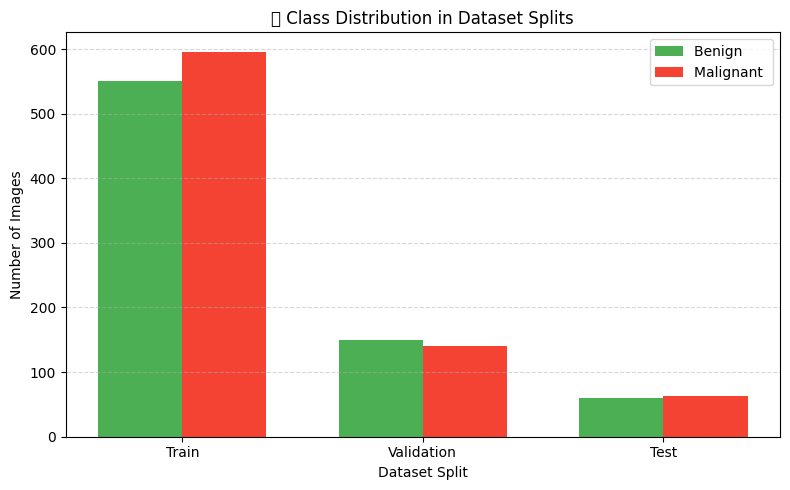

In [13]:
import os
import matplotlib.pyplot as plt

# Define paths to label directories for each dataset split
label_dirs = {
    "Train": "/content/drive/MyDrive/lung3.v1-3.yolov8/train/labels",
    "Validation": "/content/drive/MyDrive/lung3.v1-3.yolov8/val/labels",
    "Test": "/content/drive/MyDrive/lung3.v1-3.yolov8/test/labels",
}

# Function to count the number of images that contain each class (benign or malignant)
def count_classes(label_dir):
    benign_count = 0
    malignant_count = 0

    for filename in os.listdir(label_dir):
        if filename.endswith(".txt"):
            path = os.path.join(label_dir, filename)
            with open(path, "r") as f:
                lines = f.readlines()
                classes_in_image = set()

                # Collect unique class IDs from the current label file
                for line in lines:
                    class_id = int(line.split()[0])
                    classes_in_image.add(class_id)

                # Increment counts if class ID is found in the image
                if 0 in classes_in_image:
                    benign_count += 1
                if 1 in classes_in_image:
                    malignant_count += 1

    return benign_count, malignant_count

# Prepare data for visualization
splits = []
benign_counts = []
malignant_counts = []

# Count the number of benign and malignant images in each dataset split
for split, path in label_dirs.items():
    benign, malignant = count_classes(path)
    splits.append(split)
    benign_counts.append(benign)
    malignant_counts.append(malignant)

# Plotting the class distribution
x = range(len(splits))
width = 0.35

plt.figure(figsize=(8, 5))

plt.bar([i - width/2 for i in x], benign_counts, width=width, label="Benign", color="#4CAF50")

plt.bar([i + width/2 for i in x], malignant_counts, width=width, label="Malignant", color="#F44336")

# Customize the plot
plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.title("📊 Class Distribution in Dataset Splits")
plt.xticks(ticks=x, labels=splits)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## 🚀 Installing Ultralytics for YOLOv8

In [ ]:
!pip install ultralytics


# 🧠 Fine-Tuning YOLOv8s on a Custom Lung X-ray Dataset

We used [YOLOv8s](https://github.com/ultralytics/ultralytics) (small version) from the **Ultralytics** library to perform **fine-tuning** on a medical dataset containing lung X-ray images. Fine-tuning allows the model to adapt pre-trained weights to a new, domain-specific dataset—improving accuracy and reducing training time.

## 🔧 Key Training Settings:

- **Base Model**: `yolov8s.pt` (pre-trained on COCO)
- **Epochs**: 120
- **Batch Size**: 32
- **Image Size**: 640×640
- **Device**: GPU (CUDA 0)

## 🧪 Data Augmentations Used:

These augmentations help prevent overfitting and improve generalization:

| Augmentation       | Description                                |
|--------------------|--------------------------------------------|
| `hsv_h/s/v`        | Color variations (Hue/Saturation/Value)    |
| `degrees`          | Random image rotation                      |
| `translate`        | Image shifting                             |
| `scale`            | Random zoom-in/out                         |
| `shear`            | Geometric distortion                       |
| `perspective`      | Slight change in camera angle              |
| `fliplr`           | Horizontal flips                           |
| `mosaic`           | Combine 4 images into one (YOLO specialty) |
| `mixup`            | Blend two images for regularization        |

## 📁 Dataset Path

The training used a custom dataset defined in:

```yaml
/data.yaml


In [ ]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8s model
model = YOLO("yolov8s.pt")

# Train the model on custom data with augmentation and fine-tuning
model.train(
    data="/content/drive/MyDrive/lung3.v1-3.yolov8/data.yaml",
    epochs=120,             # Number of training epochs
    imgsz=640,              # Input image size
    batch=32,               # Batch size
    lr0=0.001,              # Initial learning rate
    device=0,               # GPU device

    name="lung_finetune_aug",  # Project name for output folder

    # Data augmentation settings
    hsv_h=0.015,       # Hue variation
    hsv_s=0.7,         # Saturation variation
    hsv_v=0.4,         # Value (brightness) variation
    degrees=10.0,      # Rotation
    translate=0.1,     # Translation (shift)
    scale=0.5,         # Scaling
    shear=2.0,         # Shearing
    perspective=0.0005,# Perspective transformation
    flipud=0.0,        # Vertical flip probability
    fliplr=0.5,        # Horizontal flip probability
    mosaic=1.0,        # Mosaic augmentation
    mixup=0.2          # MixUp augmentation
)


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/lung3.v1-3.yolov8/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=lung_finetune_aug4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

train: Scanning /content/drive/.shortcut-targets-by-id/1j-822GqkzVHqgxu094ja-4elhLrbz5Nn/lung3.v1-3.yolov8/train/labels.cache... 1146 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1146/1146 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.0 ms, read: 13.9±0.7 MB/s, size: 18.6 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1j-822GqkzVHqgxu094ja-4elhLrbz5Nn/lung3.v1-3.yolov8/val/labels.cache... 753 images, 1 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<?, ?it/s]


Plotting labels to runs/detect/lung_finetune_aug4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/lung_finetune_aug4
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/120      6.96G      3.136      10.03      1.957         39        640: 100%|██████████| 36/36 [00:34<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]


                   all        754        753     0.0729     0.0669     0.0299    0.00861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/120      6.75G      2.436      3.554      1.492         41        640: 100%|██████████| 36/36 [00:30<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        754        753   0.000409     0.0189   0.000215   9.76e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/120      6.74G      2.484      3.286      1.489         49        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

                   all        754        753     0.0058     0.0269    0.00101   0.000434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/120      6.74G      2.391      3.332      1.476         38        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.29it/s]


                   all        754        753     0.0454     0.0449     0.0167    0.00513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/120      7.04G      2.379      3.241      1.431         46        640: 100%|██████████| 36/36 [00:30<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.05it/s]


                   all        754        753      0.107    0.00897    0.00628    0.00204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/120      6.75G      2.358      3.073      1.428         45        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.37it/s]

                   all        754        753      0.158      0.146     0.0959     0.0328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/120      6.74G      2.257      2.978      1.394         47        640: 100%|██████████| 36/36 [00:31<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.38it/s]


                   all        754        753      0.174      0.121     0.0803     0.0289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/120      7.04G      2.291      2.952      1.381         44        640: 100%|██████████| 36/36 [00:33<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.38it/s]


                   all        754        753      0.126     0.0834     0.0704     0.0227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/120      7.04G      2.236      2.819      1.373         51        640: 100%|██████████| 36/36 [00:31<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        754        753      0.688      0.155      0.167     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/120      7.04G      2.199      2.825      1.349         43        640: 100%|██████████| 36/36 [00:32<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.21it/s]

                   all        754        753      0.186      0.111      0.109     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/120      7.04G      2.174      2.807      1.348         55        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.20it/s]


                   all        754        753      0.191      0.153      0.144     0.0518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/120      6.74G      2.174      2.818      1.343         42        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.31it/s]

                   all        754        753       0.21      0.219      0.174     0.0675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/120      6.74G      2.192       2.67      1.349         44        640: 100%|██████████| 36/36 [00:29<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.32it/s]

                   all        754        753      0.184      0.247      0.181     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/120      7.04G      2.138      2.685      1.306         42        640: 100%|██████████| 36/36 [00:35<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.17it/s]

                   all        754        753       0.19      0.236      0.149     0.0516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/120      6.74G      2.156      2.689      1.344         49        640: 100%|██████████| 36/36 [00:31<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.24it/s]

                   all        754        753      0.148      0.202       0.18     0.0718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/120      7.04G      2.095      2.628      1.299         36        640: 100%|██████████| 36/36 [00:30<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]

                   all        754        753      0.713      0.194      0.216     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/120      7.04G      2.156      2.633      1.351         50        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all        754        753      0.714       0.18      0.198     0.0782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/120      7.04G      2.082      2.508      1.317         39        640: 100%|██████████| 36/36 [00:31<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.21it/s]

                   all        754        753      0.225      0.245      0.165     0.0662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/120      6.74G      2.096      2.521      1.291         43        640: 100%|██████████| 36/36 [00:31<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.19it/s]

                   all        754        753      0.268       0.25        0.2     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/120      7.04G      2.102       2.52      1.317         47        640: 100%|██████████| 36/36 [00:32<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.15it/s]

                   all        754        753      0.195      0.373       0.24     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/120      6.74G      2.052       2.48      1.288         39        640: 100%|██████████| 36/36 [00:32<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.02it/s]

                   all        754        753      0.689      0.182      0.179     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/120      6.74G      2.069      2.472      1.297         31        640: 100%|██████████| 36/36 [00:32<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.37it/s]

                   all        754        753      0.244      0.378      0.248     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120      7.04G      2.095      2.536      1.292         32        640: 100%|██████████| 36/36 [00:30<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.28it/s]

                   all        754        753       0.27      0.298      0.244      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120      7.04G      2.037      2.358      1.271         36        640: 100%|██████████| 36/36 [00:30<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.25it/s]

                   all        754        753      0.286      0.426      0.315      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120      7.04G      2.014      2.342      1.281         40        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all        754        753      0.231      0.261      0.178     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      7.04G      2.015      2.275      1.266         41        640: 100%|██████████| 36/36 [00:30<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.24it/s]

                   all        754        753      0.291      0.257      0.207     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      6.74G       1.97      2.268      1.257         45        640: 100%|██████████| 36/36 [00:30<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

                   all        754        753      0.255      0.422      0.325      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120      7.04G      1.989      2.238      1.264         45        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.16it/s]

                   all        754        753      0.312      0.326      0.259      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120      6.74G      1.959      2.272      1.247         50        640: 100%|██████████| 36/36 [00:29<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

                   all        754        753      0.328      0.451      0.357      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      7.04G       2.02      2.254      1.285         39        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.18it/s]

                   all        754        753      0.346      0.397      0.341      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      7.04G      2.004      2.213      1.281         40        640: 100%|██████████| 36/36 [00:30<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.23it/s]

                   all        754        753      0.287      0.424      0.346      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      6.74G      1.967      2.245      1.274         39        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.21it/s]

                   all        754        753      0.317      0.435      0.352      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120      7.04G       1.96      2.215      1.254         32        640: 100%|██████████| 36/36 [00:29<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.32it/s]


                   all        754        753      0.293      0.424      0.354      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      7.04G      1.948      2.155      1.248         41        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.40it/s]

                   all        754        753      0.793      0.303      0.389      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      7.04G      1.924       2.16      1.229         55        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.25it/s]

                   all        754        753      0.425      0.422      0.399       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      7.04G      1.922      2.118      1.245         41        640: 100%|██████████| 36/36 [00:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.14it/s]

                   all        754        753      0.471       0.53      0.475      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      7.04G      1.946       2.16      1.252         48        640: 100%|██████████| 36/36 [00:31<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.19it/s]

                   all        754        753      0.322      0.415      0.358      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120      7.04G      1.903      2.027      1.243         40        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.18it/s]

                   all        754        753      0.482      0.527      0.474      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      7.04G      1.959      2.097      1.235         45        640: 100%|██████████| 36/36 [00:31<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.23it/s]

                   all        754        753      0.423      0.471      0.409      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120      6.74G      1.866       2.06      1.217         42        640: 100%|██████████| 36/36 [00:30<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.16it/s]

                   all        754        753      0.455      0.535      0.508      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120      6.74G       1.86      1.961      1.204         46        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

                   all        754        753      0.457      0.473      0.456      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120      6.74G      1.859      1.943      1.221         40        640: 100%|██████████| 36/36 [00:28<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.23it/s]

                   all        754        753      0.577      0.485      0.507      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      6.74G      1.897      1.989       1.22         33        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.25it/s]

                   all        754        753       0.52      0.472      0.454        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120      6.74G      1.884      1.946      1.208         45        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.23it/s]

                   all        754        753      0.496      0.481      0.458       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120      7.04G       1.86      1.961      1.207         46        640: 100%|██████████| 36/36 [00:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.04s/it]

                   all        754        753      0.515      0.497      0.472      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120      7.04G      1.863      1.892      1.205         29        640: 100%|██████████| 36/36 [00:29<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.23it/s]

                   all        754        753      0.568      0.552      0.562      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      7.04G      1.839      1.887      1.207         47        640: 100%|██████████| 36/36 [00:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.36it/s]

                   all        754        753      0.645      0.535      0.566      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      6.74G      1.831      1.944      1.214         36        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.36it/s]

                   all        754        753      0.663       0.59       0.63      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      7.04G      1.845      1.854      1.195         37        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.23it/s]

                   all        754        753      0.659      0.513      0.559      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      6.74G      1.819      1.883       1.17         36        640: 100%|██████████| 36/36 [00:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.09it/s]

                   all        754        753      0.735      0.554      0.647       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      7.04G      1.829      1.826       1.19         37        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.20it/s]

                   all        754        753      0.683      0.629      0.671      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      7.04G      1.814      1.855      1.188         31        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.20it/s]

                   all        754        753      0.704       0.58      0.645      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      7.04G      1.828      1.844      1.191         44        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.17it/s]

                   all        754        753      0.603      0.613      0.608       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      7.04G      1.812      1.726      1.174         34        640: 100%|██████████| 36/36 [00:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

                   all        754        753      0.721      0.619      0.672      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      6.74G      1.815      1.784      1.173         35        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.24it/s]

                   all        754        753      0.603      0.545       0.54      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      6.74G      1.802      1.767      1.173         41        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.42it/s]

                   all        754        753      0.572      0.453      0.476      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120      7.04G      1.786      1.731      1.177         44        640: 100%|██████████| 36/36 [00:30<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.40it/s]

                   all        754        753      0.752      0.586      0.674      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      7.04G      1.792      1.665      1.181         47        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.21it/s]

                   all        754        753      0.786      0.659      0.714      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120      7.04G      1.783      1.711      1.183         38        640: 100%|██████████| 36/36 [00:29<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.19it/s]

                   all        754        753      0.734      0.645        0.7      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      7.04G      1.824       1.72      1.182         52        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.04s/it]

                   all        754        753      0.757       0.64      0.709        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      7.04G      1.756      1.655      1.164         46        640: 100%|██████████| 36/36 [00:27<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]

                   all        754        753      0.794       0.62      0.706       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120      7.04G      1.757       1.64      1.164         50        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

                   all        754        753      0.824      0.661      0.754      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120      7.04G      1.722      1.588      1.153         37        640: 100%|██████████| 36/36 [00:29<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

                   all        754        753      0.821       0.68      0.759      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      7.04G      1.731      1.606      1.163         48        640: 100%|██████████| 36/36 [00:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.26it/s]

                   all        754        753       0.81      0.644      0.752      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      6.74G      1.721      1.564      1.148         53        640: 100%|██████████| 36/36 [00:29<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.21it/s]

                   all        754        753      0.679       0.66      0.692      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      6.74G      1.781      1.616      1.173         43        640: 100%|██████████| 36/36 [00:29<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.30it/s]

                   all        754        753      0.848      0.671      0.769      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120      6.74G       1.72      1.579       1.15         43        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.31it/s]

                   all        754        753      0.811      0.723      0.779      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      7.04G      1.689      1.603      1.148         33        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.26it/s]

                   all        754        753       0.78      0.683      0.747      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      7.04G      1.742      1.601      1.151         45        640: 100%|██████████| 36/36 [00:29<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.16it/s]

                   all        754        753      0.801      0.655       0.75      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      7.04G       1.71      1.551      1.146         36        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        754        753      0.832      0.694      0.783      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120      7.04G      1.689      1.509       1.14         58        640: 100%|██████████| 36/36 [00:29<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        754        753      0.778      0.673       0.74      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120      7.04G      1.718      1.516      1.154         43        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.20it/s]

                   all        754        753      0.858      0.729      0.819       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      7.04G      1.677      1.503      1.137         52        640: 100%|██████████| 36/36 [00:29<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.21it/s]

                   all        754        753      0.858      0.734      0.811      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      7.04G       1.66      1.476      1.121         37        640: 100%|██████████| 36/36 [00:29<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.24it/s]

                   all        754        753      0.854       0.72      0.811       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      7.04G      1.649      1.419      1.121         31        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.27it/s]

                   all        754        753      0.884      0.749      0.843      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      7.04G       1.69      1.462      1.157         46        640: 100%|██████████| 36/36 [00:28<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        754        753      0.836      0.724      0.799      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      7.04G      1.688      1.466      1.136         45        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.29it/s]

                   all        754        753       0.85      0.747      0.814      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      7.04G      1.631      1.356      1.125         42        640: 100%|██████████| 36/36 [00:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.27it/s]

                   all        754        753      0.887      0.769      0.857      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      7.04G      1.664      1.458       1.13         43        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]

                   all        754        753      0.832      0.737      0.811      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120      7.04G      1.641      1.391      1.115         46        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.29it/s]

                   all        754        753      0.872      0.766      0.845      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120      6.74G      1.673       1.43      1.127         38        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:12<00:00,  1.01s/it]

                   all        754        753      0.914      0.749      0.836      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120      6.74G      1.642      1.397      1.126         39        640: 100%|██████████| 36/36 [00:31<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.26it/s]

                   all        754        753      0.915      0.777      0.857      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120      6.74G      1.635      1.393      1.111         30        640: 100%|██████████| 36/36 [00:31<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.24it/s]

                   all        754        753       0.89      0.789      0.863      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      6.74G      1.631      1.399       1.13         46        640: 100%|██████████| 36/36 [00:31<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.27it/s]

                   all        754        753      0.836      0.656      0.744      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      6.74G      1.622      1.376      1.111         50        640: 100%|██████████| 36/36 [00:28<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.08it/s]

                   all        754        753      0.942      0.767      0.869      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      6.74G      1.591      1.295      1.101         38        640: 100%|██████████| 36/36 [00:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.17it/s]

                   all        754        753      0.867      0.775      0.855      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      6.74G      1.621      1.352      1.123         47        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.21it/s]

                   all        754        753      0.887      0.795      0.865        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      6.74G      1.595      1.283      1.098         40        640: 100%|██████████| 36/36 [00:29<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.17it/s]

                   all        754        753      0.913      0.765      0.865      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      6.74G      1.604       1.32       1.11         50        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.19it/s]

                   all        754        753      0.926      0.761      0.864      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      7.04G      1.555      1.258      1.092         42        640: 100%|██████████| 36/36 [00:28<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all        754        753      0.922      0.777       0.87       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120      6.74G      1.616      1.345      1.102         30        640: 100%|██████████| 36/36 [00:30<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.23it/s]

                   all        754        753      0.898      0.807      0.869      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120      6.74G      1.595      1.294      1.094         41        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.32it/s]

                   all        754        753      0.921      0.799       0.88      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      6.74G      1.568      1.272      1.089         36        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.39it/s]

                   all        754        753      0.886      0.829      0.886      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      6.74G      1.587      1.293      1.094         40        640: 100%|██████████| 36/36 [00:31<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.18it/s]

                   all        754        753       0.91      0.817      0.891      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      7.04G      1.566      1.285      1.098         40        640: 100%|██████████| 36/36 [00:32<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.29it/s]

                   all        754        753      0.906      0.832      0.888       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      6.74G      1.586      1.231      1.093         40        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.41it/s]

                   all        754        753      0.919       0.81      0.892      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      7.04G       1.58      1.271      1.106         43        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.28it/s]

                   all        754        753      0.935      0.799      0.879      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      7.04G      1.566      1.253       1.08         44        640: 100%|██████████| 36/36 [00:31<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.31it/s]

                   all        754        753      0.921      0.827      0.896      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      7.04G      1.524      1.196      1.068         41        640: 100%|██████████| 36/36 [00:30<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.26it/s]

                   all        754        753      0.935       0.82      0.887      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      7.04G      1.556       1.23       1.09         44        640: 100%|██████████| 36/36 [00:30<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.25it/s]

                   all        754        753      0.941      0.833      0.898      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      7.04G       1.54      1.209      1.076         41        640: 100%|██████████| 36/36 [00:30<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.20it/s]

                   all        754        753      0.904      0.833      0.905      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      7.04G      1.541      1.205      1.084         47        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.16it/s]

                   all        754        753       0.95      0.825      0.906      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      7.04G      1.488      1.133       1.07         36        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.09it/s]

                   all        754        753      0.939       0.84      0.906      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120      6.74G      1.516      1.144      1.069         43        640: 100%|██████████| 36/36 [00:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.03it/s]

                   all        754        753      0.958      0.828       0.91       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120      6.74G      1.503      1.175      1.079         50        640: 100%|██████████| 36/36 [00:30<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all        754        753      0.954       0.83      0.909      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      6.74G      1.516      1.155      1.074         38        640: 100%|██████████| 36/36 [00:30<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.21it/s]

                   all        754        753      0.953      0.835      0.903      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      6.74G      1.475      1.126      1.066         44        640: 100%|██████████| 36/36 [00:29<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        754        753      0.927      0.859       0.91      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120      6.74G      1.527      1.188      1.073         33        640: 100%|██████████| 36/36 [00:30<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.06it/s]

                   all        754        753      0.953      0.857      0.913      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      7.04G      1.482      1.121      1.066         37        640: 100%|██████████| 36/36 [00:30<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.16it/s]

                   all        754        753      0.946      0.857      0.917      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      7.04G      1.506      1.202      1.102         36        640: 100%|██████████| 36/36 [00:30<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.20it/s]

                   all        754        753       0.96      0.851      0.916      0.532


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      7.04G      1.262      0.789      1.035         26        640: 100%|██████████| 36/36 [00:29<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

                   all        754        753      0.947      0.848      0.918      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120      7.04G      1.231     0.7243      1.033         25        640: 100%|██████████| 36/36 [00:25<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.41it/s]

                   all        754        753       0.94      0.852      0.918      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120      7.04G      1.212     0.6968      1.021         26        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.19it/s]

                   all        754        753      0.945      0.854      0.926      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      7.04G      1.206      0.666       1.02         26        640: 100%|██████████| 36/36 [00:25<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.29it/s]

                   all        754        753      0.957      0.846      0.924      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      7.04G      1.197     0.6798      1.014         26        640: 100%|██████████| 36/36 [00:24<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.25it/s]

                   all        754        753      0.948      0.872      0.924      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      7.04G      1.201     0.6782      1.015         25        640: 100%|██████████| 36/36 [00:25<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.25it/s]

                   all        754        753      0.951      0.858      0.925      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120      7.04G      1.181     0.6388     0.9997         26        640: 100%|██████████| 36/36 [00:24<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.28it/s]

                   all        754        753      0.946      0.881      0.927      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120      7.04G      1.155     0.6359     0.9988         26        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.24it/s]

                   all        754        753      0.947      0.881      0.926      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      7.04G      1.161     0.6522      1.008         25        640: 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.36it/s]

                   all        754        753      0.957      0.878      0.929      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120      7.04G       1.15     0.6361     0.9992         25        640: 100%|██████████| 36/36 [00:25<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:09<00:00,  1.22it/s]

                   all        754        753      0.953      0.877      0.928      0.567



120 epochs completed in 1.358 hours.
Optimizer stripped from runs/detect/lung_finetune_aug4/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/lung_finetune_aug4/weights/best.pt, 22.5MB

Validating runs/detect/lung_finetune_aug4/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:13<00:00,  1.10s/it]


                   all        754        753      0.946      0.881      0.926      0.585
                benign        252        252      0.939      0.852      0.899       0.54
             malignant        501        501      0.953       0.91      0.953      0.631
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/lung_finetune_aug4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78880efcfd10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Understanding the Model Output: Validation Results

When training object detection models like YOLO, the metrics such as **mAP50**, **Precision**, and **Recall** that you see after each epoch are **evaluated on the validation dataset**, *not* on the training data.

### Why is this important?

- During **training**, the model focuses on minimizing the **loss** (e.g., box loss, classification loss) calculated on the **training data**.
- However, the **performance metrics** (like mAP50) are computed using a separate set of images called the **validation set**.
- This allows you to monitor how well your model generalizes to unseen data, preventing overfitting.
- Therefore, the **mAP50 and related scores you see after each epoch indicate how well your model performs on the validation data**, not the training data.

### Summary

| Metric        | Dataset        | Purpose                                |
|---------------|----------------|--------------------------------------|
| Loss          | Training       | Guides the model learning process    |
| mAP50, etc.   | Validation     | Evaluates model performance on new data |

Monitoring validation metrics is crucial to ensure your model is learning properly and can generalize beyond the training examples.


In [15]:
##The following results are from the previous code. They have been placed here for clarification and display purposes.



📊 Validation Results Summary (YOLOv8 - Lung X-ray Model)
------------------------------------------------------------
Class           Precision (P)   Recall (R)      mAP@0.5      
------------------------------------------------------------
All             0.946           0.881           0.926        
Benign          0.939           0.852           0.899        
Malignant       0.953           0.910           0.953        
------------------------------------------------------------
✔️ Model performs best on malignant cases with high precision and recall.
✔️ Overall detection is strong with mAP@0.5 of 92.6%.


##📊 Save the current model manually




In [ ]:

model.save('/content/drive/MyDrive/lung_yolo_manualllll.pt')


## 🚀 YOLO Model Testing



In [23]:
from ultralytics import YOLO

# Load the trained model from the saved weights file
model = YOLO("/content/drive/MyDrive/lung_yolo_manualllll.pt")

# Validate the model on the test dataset defined in the data.yaml file
metrics = model.val(data="/content/drive/MyDrive/lung3.v1-3.yolov8/data.yaml", split="test")

# Print the evaluation metrics to see the performance on the test set
print(metrics)


  Class     Images  Instances      Box(P          R      mAP50  ): 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]
                   all        123        123      0.85     0.832    0.862     
                benign         61         61      0.82     0.813    0.843    
             malignant         62         62      0.88     0.842    0.884    


##🧠 Test thr model on random image

In [ ]:
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"تم رفع الصورة: {image_path}")


Saving JPCLN006_png_jpg.rf.9a6ad0482e706453eb72b5a2e39c1659.jpg to JPCLN006_png_jpg.rf.9a6ad0482e706453eb72b5a2e39c1659.jpg
تم رفع الصورة: JPCLN006_png_jpg.rf.9a6ad0482e706453eb72b5a2e39c1659.jpg



image 1/1 /content/JPCLN006_png_jpg.rf.9a6ad0482e706453eb72b5a2e39c1659.jpg: 640x640 1 benign, 16.3ms
Speed: 4.4ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


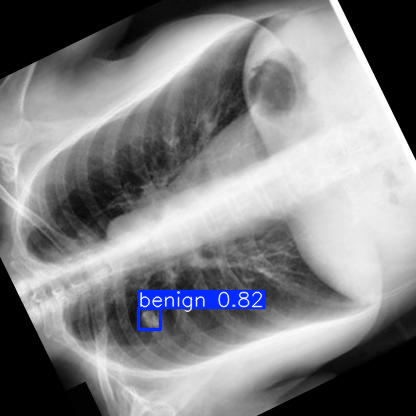

الكشف رقم 1:
- الصنف (class): 0
- الثقة (confidence): 0.82
- الإحداثيات: x1=139, y1=309, x2=160, y2=330
------------------------------


In [ ]:
# Run inference on the uploaded image using the loaded model
results = model(image_path)

# Display the image with predicted bounding boxes
results[0].show()

# Save the result image with bounding boxes to a file named "result.jpg"
results[0].save(filename="result.jpg")

# Extract the detected bounding boxes information
boxes = results[0].boxes

# Loop through each detected box and print details: class, confidence, and coordinates
for i in range(len(boxes)):
    x1, y1, x2, y2 = boxes.xyxy[i].tolist()
    conf = boxes.conf[i].item()
    cls = int(boxes.cls[i].item())

    print(f"الكشف رقم #{i+1}:")
    print(f"- الصنف: {cls}")
    print(f"-الثقة(Confidence): {conf:.2f}")
    print(f"- الإحداثيات: x1={x1:.0f}, y1={y1:.0f}, x2={x2:.0f}, y2={y2:.0f}")
    print("-" * 30)
